In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr


In [2]:
plt.style.use("~/nice.mplstyle")

In [4]:
data_dir = "/pscratch/sd/t/timothys/nested-eagle/v0"
kw = {"decode_timedelta": True}

In [ ]:
tds = xr.open_dataset("/pscratch/sd/t/timothys/nested-eagle/v0/10percent/csmswt/win4320/inference-validation/spectra.truth.nested-lam.nc", decode_timedelta=True)

In [6]:
channels = {
    512: xr.open_dataset(f"{data_dir}/10percent/csmswt/logoffline-trim10-ll10-win4320/inference-validation/spectra.predictions.nested-lam.nc",**kw),
#    1024: xr.open_dataset(f"{data_dir}/10percent/csmswt/nc1024-trim10-ll10-win4320/inference-validation/spectra.predictions.nested-lam.nc",**kw),
}


In [17]:
traintime = {
    "30k": xr.open_dataset(f"{data_dir}/10percent/csmswt/logoffline-trim10-ll10-win4320/inference-validation/spectra.predictions.nested-lam.nc",**kw),
    "60k": xr.open_dataset(f"{data_dir}/300epochs/csmswt/steps060k/inference-validation/spectra.predictions.nested-lam.nc",**kw),
    "120k": xr.open_dataset(f"{data_dir}/300epochs/csmswt/steps120k/inference-validation/spectra.predictions.nested-lam.nc",**kw),
    "HRRR Analysis": tds,
}

In [11]:
nice_names = {
    "sp": "Surface Pressure",
    "u10": "10m Zonal Wind",
    "v10": "10m Meridional Wind",
    "t2m": "2m Temperature",
    "sh2": "2m Specific Humidity",
    "gh": "Geopotential Height",
    "u": "Zonal Wind",
    "v": "Meridional Wind",
    "w": "Vertical Velocity",
    "t": "Temperature",
    "q": "Specific Humidity",
}

In [18]:
def plot_spectra(fhr, dsdict):
    fig, axs = plt.subplots(1, 2, figsize=(10, 4.5), constrained_layout=True, sharey=True)
    
    for varname, ax in zip(tds.data_vars, axs):
        for label, xds in dsdict.items():
            xds[varname].sel(fhr=fhr).plot(ax=ax, label=label, color=None if label != "HRRR Analysis" else "gray")
    
        ax.set(
            yscale="log",
            xscale="log",
            title=f"{nice_names[varname]}\nLead Time = {fhr}h",
            xlabel="$k$",
            ylabel="$P(k)$" if ax.get_subplotspec().is_first_col() else "",
        )
        ax.legend(loc="lower left")
    return fig, axs
    #fig.savefig(f"figures/channels_spectra_{fhr:03d}h.jpeg", bbox_inches="tight", dpi=300)

(<Figure size 1000x450 with 2 Axes>,
 array([<Axes: title={'center': '10m Zonal Wind\nLead Time = 240h'}, xlabel='$k$', ylabel='$P(k)$'>,
        <Axes: title={'center': '10m Meridional Wind\nLead Time = 240h'}, xlabel='$k$'>],
       dtype=object))

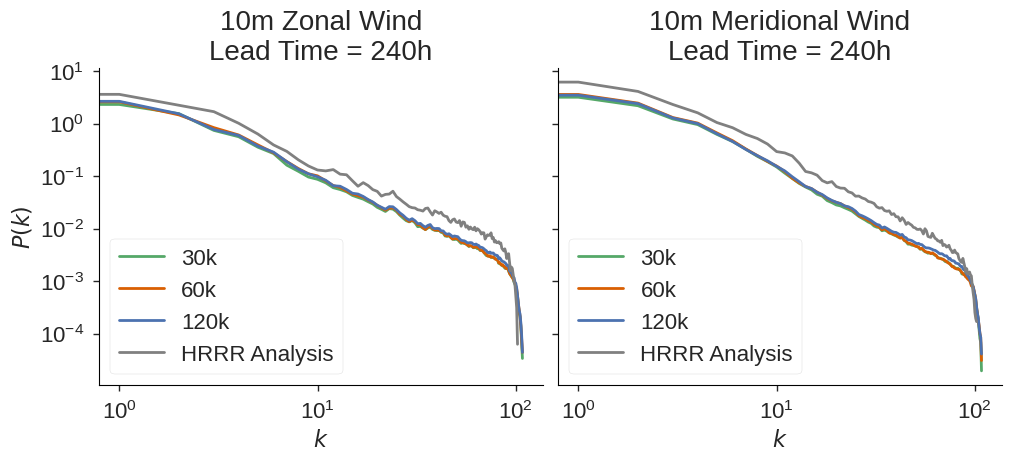

In [21]:
plot_spectra(fhr=240, dsdict=traintime)